### Step 1:
Load the dataset

In [2]:
import pandas as pd
Customer = pd.read_csv(r'C:\Users\Dell\Desktop\Machine Learning\unsupervied\K-means clustering\Mall_Customers.csv')
trip_advi_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
MALL_C=Customer.copy()

In [4]:
Customer.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

####  Removing Unnecessary variable

In [6]:
# forget about the users for the moment - we'll use this later
del Customer['CustomerID']

In [7]:
# forget about the users for the moment - we'll use this later
del Customer['Genre']

In [8]:
Customer

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [9]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


### Step 2:
Extract the measurements from the DataFrame using its .values attribute:

In [10]:
samples = Customer.values # get all row and columne with header 

samples

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

### Step 3:
1. Measure the quality of clusterings with different numbers of clusters using the inertia. 

2. For each of the given values of k, perform the following steps:
3. Create a KMeans instance called model with k clusters.
4. Fit the model to the grain data samples.
5. Append the value of the inertia_ attribute of model to the list inertias.

In [11]:
SSE=[] # empty List
SSE

[]

In [12]:
from sklearn.cluster import KMeans

ks = range(1,6)   #ks=1,2,3,4,5
SSE = [] # within-cluster sum-of-squares ( empty list)


#k=ks=

for k in ks:  # ks = k = 1,2,3,4,5
    # Create a KMeans instance with k clusters:
    
    model = KMeans(n_clusters=k) # k =1,2,3,4,5

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    SSE.append(model.inertia_)  # variance or SSE 
    # Inertia: Sum of distances of samplesto their closest cluster center

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
SSE

[308812.78,
 212840.1698209719,
 143342.751571706,
 104366.15145556198,
 75350.77917248776]

#### Elbow Method 

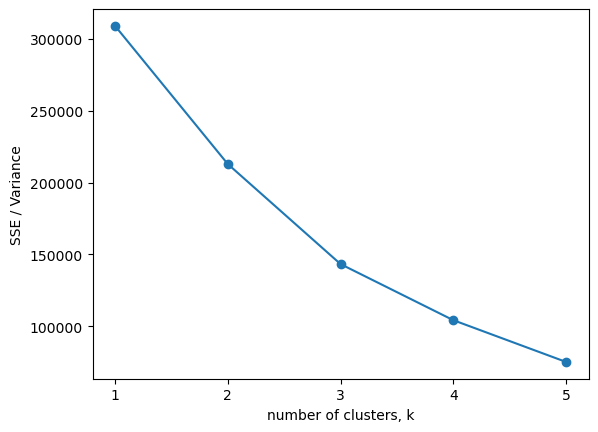

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot ks vs inertias
plt.plot(ks, SSE, '-o') # -o is point in graph to identify the cluster
plt.xlabel('number of clusters, k')
plt.ylabel('SSE / Variance')
plt.xticks(ks) # to get exact number of cluster without decimal
plt.show()

Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

In [15]:
model2 = KMeans(n_clusters=3,max_iter=100)

In [16]:
MALL_C['Cluster_Made'] = model2.fit_predict(samples)
MALL_C.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Made
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [17]:
model2.cluster_centers_

array([[40.32520325, 44.15447154, 49.82926829],
       [32.69230769, 86.53846154, 82.12820513],
       [40.39473684, 87.        , 18.63157895]])

In [18]:
MALL_C.Cluster_Made.value_counts(ascending=False)

0    123
1     39
2     38
Name: Cluster_Made, dtype: int64

# Business Submission

In [20]:
Submission=MALL_C.loc[:,['CustomerID','Cluster_Made']]
Submission

,CustomerID,Cluster_Made
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
195,196,1
196,197,2
197,198,1
198,199,2


In [21]:
import os
os.chdir(r"C:\Users\Dell\Desktop\Machine Learning\unsupervied\K-means clustering")

In [22]:
Submission.to_excel("MALL_C_output.xlsx",index=False,sheet_name="Output") 